**Building a Simple Decision Tree**

In [2]:
!brew reinstall graphviz

==> Downloading https://ghcr.io/v2/homebrew/core/freetype/manifests/2.11.1
######################################################################## 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/freetype/blobs/sha256:e5f8d1d7a
==> Downloading from https://pkg-containers.githubusercontent.com/ghcr1/blobs/sh
######################################################################## 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/jpeg/manifests/9e
######################################################################## 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/jpeg/blobs/sha256:4c19f39c827ee
==> Downloading from https://pkg-containers.githubusercontent.com/ghcr1/blobs/sh
######################################################################## 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/giflib/manifests/5.2.1
######################################################################## 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/giflib/blobs/

==> Downloading https://ghcr.io/v2/homebrew/core/libx11/blobs/sha256:61f5bff3afe
==> Downloading from https://pkg-containers.githubusercontent.com/ghcr1/blobs/sh
######################################################################## 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/libxext/manifests/1.3.4
######################################################################## 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/libxext/blobs/sha256:20cc49734e
==> Downloading from https://pkg-containers.githubusercontent.com/ghcr1/blobs/sh
######################################################################## 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/libxrender/manifests/0.9.10
######################################################################## 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/libxrender/blobs/sha256:cb7f488
==> Downloading from https://pkg-containers.githubusercontent.com/ghcr1/blobs/sh
############################################

🍺  /usr/local/Cellar/giflib/5.2.1: 19 files, 383.5KB
==> Installing graphviz dependency: webp
==> Pouring webp--1.2.2.catalina.bottle.tar.gz
🍺  /usr/local/Cellar/webp/1.2.2: 41 files, 2.5MB
==> Installing graphviz dependency: gd
==> Pouring gd--2.3.3_1.catalina.bottle.tar.gz
🍺  /usr/local/Cellar/gd/2.3.3_1: 33 files, 1.4MB
==> Installing graphviz dependency: libffi
==> Pouring libffi--3.4.2.catalina.bottle.tar.gz
🍺  /usr/local/Cellar/libffi/3.4.2: 17 files, 599.8KB
==> Installing graphviz dependency: pcre
==> Pouring pcre--8.45.catalina.bottle.tar.gz
🍺  /usr/local/Cellar/pcre/8.45: 204 files, 5.8MB
==> Installing graphviz dependency: sqlite
==> Pouring sqlite--3.37.2.catalina.bottle.tar.gz
🍺  /usr/local/Cellar/sqlite/3.37.2: 11 files, 4.3MB
==> Installing graphviz dependency: python@3.9
==> Pouring python@3.9--3.9.10.catalina.bottle.tar.gz
==> /usr/local/Cellar/python@3.9/3.9.10/bin/python3 -m ensurepip
==> /usr/local/Cellar/python@3.9/3.9.10/bin/python3 -m pip install -v --no-deps 
🍺 

==> Summary
🍺  /usr/local/Cellar/ghostscript/9.55.0: 683 files, 148.2MB
==> Running `brew cleanup ghostscript`...
Removing: /usr/local/Cellar/ghostscript/9.54.0... (1,752 files, 181.7MB)
==> Checking for dependents of upgraded formulae...
==> No broken dependents found!


In [4]:
!pip install dtreeviz

     |████████████████████████████████| 61 kB 5.7 kB/s eta 0:00:011
     |████████████████████████████████| 46 kB 14.2 MB/s eta 0:00:01
  Created wheel for dtreeviz: filename=dtreeviz-1.3.3-py3-none-any.whl size=67114 sha256=451282687814cfd0c97839e5843f4797bd2b48b495be29367a872cb6a231d5fd
  Stored in directory: /Users/pwalters/Library/Caches/pip/wheels/15/2a/f4/3fc2b324bcf7d313af42eda3b1d77acf6c44b9cd62e93fc832
Successfully built dtreeviz


In [9]:
import pandas as pd #data table manipulation
from rdkit import Chem # basic cheminformatics
from rdkit.Chem.Descriptors import MolWt, MolLogP, NumAromaticRings, NumHDonors, NumHAcceptors
import math #needed for log10
import seaborn as sns #plotting
from sklearn.tree import DecisionTreeClassifier, plot_tree # descision trees 
from sklearn.model_selection import train_test_split # split a dataset
from tqdm import tqdm # progress bar
from matplotlib import pyplot as plt # plotting
from dtreeviz.trees import * #plotting decision trees
from sklearn.metrics import roc_auc_score, matthews_corrcoef, cohen_kappa_score, plot_roc_curve, plot_confusion_matrix # model stats
from tdc.single_pred import ADME

Enable Pandas **progress_apply**

In [6]:
tqdm.pandas()

A simple function to calculate molecular weight, LogP, number of aromatic rings, number of hydrogen bond donors and acceptors from a SMILES

In [33]:
def calc_descriptors(smi):
    mol = Chem.MolFromSmiles(smi)
    if mol:
        Chem.DeleteSubstructs(mol, Chem.MolFromSmarts("[#1X0]"))
        mw, logp, num_arom_rings, hbd, hba = [x(mol) for x in [MolWt, MolLogP, NumAromaticRings, NumHDonors, NumHAcceptors]]
        res = [mw, logp, num_arom_rings, hbd, hba]
    else:
        res = [None] * 5
    return res

Read data from ["ESOL:  Estimating Aqueous Solubility Directly from Molecular Structure"](https://pubs.acs.org/doi/10.1021/ci034243x)

In [34]:
data = ADME(name = 'Solubility_AqSolDB')
sol_df = data.get_data()

Found local copy...
Loading...
Done!


In [35]:
sol_df

,Drug_ID,Drug,Y
0,"N,N,N-trimethyloctadecan-1-aminium bromide",CCCCCCCCCCCCCCCCCC[N+](C)(C)C.[Br-],-3.616127
1,Benzo[cd]indol-2(1H)-one,O=C1Nc2cccc3cccc1c23,-3.254767
2,4-chlorobenzaldehyde,O=Cc1ccc(Cl)cc1,-2.177078
3,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",CC(c1ccccc1)c1cc(C(=O)[O-])c(O)c(C(C)c2ccccc2)...,-3.924409
4,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,c1cc(N(CC2CO2)CC2CO2)ccc1Cc1ccc(N(CC2CO2)CC2CO...,-4.662065
...,...,...,...
9977,tetracaine,CCCCNc1ccc(C(=O)OCCN(C)C)cc1,-3.010000
9978,tetracycline,CN(C)[C@@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C...,-2.930000
9979,thymol,Cc1ccc(C(C)C)c(O)c1,-2.190000
9980,verapamil,COc1ccc(CCN(C)CCCC(C#N)(c2ccc(OC)c(OC)c2)C(C)C...,-3.980000


In [36]:
sol_df.columns = ["Name","SMILES","LogS"]
sol_df

,Name,SMILES,LogS
0,"N,N,N-trimethyloctadecan-1-aminium bromide",CCCCCCCCCCCCCCCCCC[N+](C)(C)C.[Br-],-3.616127
1,Benzo[cd]indol-2(1H)-one,O=C1Nc2cccc3cccc1c23,-3.254767
2,4-chlorobenzaldehyde,O=Cc1ccc(Cl)cc1,-2.177078
3,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",CC(c1ccccc1)c1cc(C(=O)[O-])c(O)c(C(C)c2ccccc2)...,-3.924409
4,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,c1cc(N(CC2CO2)CC2CO2)ccc1Cc1ccc(N(CC2CO2)CC2CO...,-4.662065
...,...,...,...
9977,tetracaine,CCCCNc1ccc(C(=O)OCCN(C)C)cc1,-3.010000
9978,tetracycline,CN(C)[C@@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C...,-2.930000
9979,thymol,Cc1ccc(C(C)C)c(O)c1,-2.190000
9980,verapamil,COc1ccc(CCN(C)CCCC(C#N)(c2ccc(OC)c(OC)c2)C(C)C...,-3.980000


In [37]:
sol_df = sol_df[['SMILES','Name','LogS']]
sol_df

,SMILES,Name,LogS
0,CCCCCCCCCCCCCCCCCC[N+](C)(C)C.[Br-],"N,N,N-trimethyloctadecan-1-aminium bromide",-3.616127
1,O=C1Nc2cccc3cccc1c23,Benzo[cd]indol-2(1H)-one,-3.254767
2,O=Cc1ccc(Cl)cc1,4-chlorobenzaldehyde,-2.177078
3,CC(c1ccccc1)c1cc(C(=O)[O-])c(O)c(C(C)c2ccccc2)...,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",-3.924409
4,c1cc(N(CC2CO2)CC2CO2)ccc1Cc1ccc(N(CC2CO2)CC2CO...,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,-4.662065
...,...,...,...
9977,CCCCNc1ccc(C(=O)OCCN(C)C)cc1,tetracaine,-3.010000
9978,CN(C)[C@@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C...,tetracycline,-2.930000
9979,Cc1ccc(C(C)C)c(O)c1,thymol,-2.190000
9980,COc1ccc(CCN(C)CCCC(C#N)(c2ccc(OC)c(OC)c2)C(C)C...,verapamil,-3.980000


Add a new column "IsSol" to indicate whether a molecule's solubility is greater than 200uM

In [38]:
sol_df['IsSol'] = sol_df.LogS > math.log10(200 * 1e-6)

Plot solubility as a sanity check

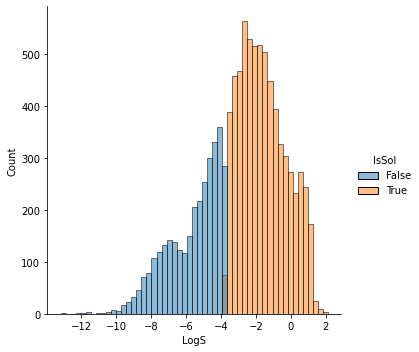

In [39]:
sns.displot(x='LogS',hue="IsSol",data=sol_df)

Add the descriptors to the dataframe.  Note that all of the descriptors are going into one column called "desc".

In [40]:
sol_df['desc'] = sol_df.SMILES.progress_apply(calc_descriptors)

  3%|█▏                                    | 298/9982 [00:00<00:06, 1529.72it/s]RDKit WARNING: [19:51:50] WARNING: not removing hydrogen atom without neighbors
[19:51:50] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:51:50] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:51:50] WARNING: not removing hydrogen atom without neighbors
[19:51:50] WARNING: not removing hydrogen atom without neighbors
  5%|█▊                                    | 469/9982 [00:00<00:05, 1610.28it/s][19:51:50] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:51:50] WARNING: not removing hydrogen atom without neighbors
[19:51:50] WARNING: not removing hydrogen atom without neighbors
  7%|██▍                                   | 651/9982 [00:00<00:05, 1691.73it/s]RDKit WARNING: [19:51:50] WARNING: not removing hydrogen atom without neighbors
[19:51:50] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:51:50] WARNING: 

 33%|████████████▏                        | 3281/9982 [00:02<00:04, 1581.50it/s]RDKit WARNING: [19:51:52] WARNING: not removing hydrogen atom without neighbors
[19:51:52] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:51:52] WARNING: not removing hydrogen atom without neighbors
[19:51:52] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:51:52] WARNING: not removing hydrogen atom without neighbors
[19:51:52] WARNING: not removing hydrogen atom without neighbors
 36%|█████████████▎                       | 3585/9982 [00:02<00:04, 1319.54it/s]RDKit WARNING: [19:51:52] WARNING: not removing hydrogen atom without neighbors
[19:51:52] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:51:52] WARNING: not removing hydrogen atom without neighbors
[19:51:52] WARNING: not removing hydrogen atom without neighbors
 37%|█████████████▊                       | 3723/9982 [00:02<00:04, 1333.50it/s]RDKit WARNING: [19:51:52] WARNING: 

Split the descriptors into their on own columns.

In [42]:
desc_cols = ['MW','LogP','NumAromatic','HBD','HBA']
sol_df[desc_cols] = sol_df.desc.to_list()

We no longer need the "desc" column, let's get rid of it. 

In [43]:
sol_df.drop("desc",axis=1,inplace=True)

Let's check the dataframe to make sure it's ok. 

In [44]:
sol_df

,SMILES,Name,LogS,IsSol,MW,LogP,NumAromatic,HBD,HBA
0,CCCCCCCCCCCCCCCCCC[N+](C)(C)C.[Br-],"N,N,N-trimethyloctadecan-1-aminium bromide",-3.616127,True,392.510,3.95810,0.0,0.0,0.0
1,O=C1Nc2cccc3cccc1c23,Benzo[cd]indol-2(1H)-one,-3.254767,True,169.183,2.40550,2.0,1.0,1.0
2,O=Cc1ccc(Cl)cc1,4-chlorobenzaldehyde,-2.177078,True,140.569,2.15250,1.0,0.0,1.0
3,CC(c1ccccc1)c1cc(C(=O)[O-])c(O)c(C(C)c2ccccc2)...,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",-3.924409,False,756.226,8.11610,6.0,2.0,6.0
4,c1cc(N(CC2CO2)CC2CO2)ccc1Cc1ccc(N(CC2CO2)CC2CO...,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,-4.662065,False,422.525,2.48540,2.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...
9977,CCCCNc1ccc(C(=O)OCCN(C)C)cc1,tetracaine,-3.010000,True,264.369,2.61700,1.0,1.0,4.0
9978,CN(C)[C@@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C...,tetracycline,-2.930000,True,444.440,-0.21440,1.0,6.0,9.0
9979,Cc1ccc(C(C)C)c(O)c1,thymol,-2.190000,True,150.221,2.82402,1.0,1.0,1.0
9980,COc1ccc(CCN(C)CCCC(C#N)(c2ccc(OC)c(OC)c2)C(C)C...,verapamil,-3.980000,False,454.611,5.09308,2.0,0.0,6.0


Split the data into training and test sets. 

In [46]:
train, test = train_test_split(sol_df)

Split the training and test sets into X and y variables. 

In [47]:
train_X = train[desc_cols]
train_y = train.IsSol
test_X = test[desc_cols]
test_y = test.IsSol

Create and train a classifier

In [48]:
cls = DecisionTreeClassifier(max_depth=2)
cls.fit(train_X,train_y)

DecisionTreeClassifier(max_depth=2)

Predict on the test set

In [49]:
pred = cls.predict(test_X)
auc, mcc, kappa = roc_auc_score(test_y, pred),matthews_corrcoef(test_y,pred),cohen_kappa_score(test_y,pred)
print(f"ROC AUC = {auc:.2f}")
print(f"Matthews Correlation Coefficient = {mcc:.2f}")
print(f"Cohen\'s Kappa = {kappa:.2f}")

ROC AUC = 0.81
Matthews Correlation Coefficient = 0.65
Cohen's Kappa = 0.64


Plot a confusion matrix to show the classifier performance

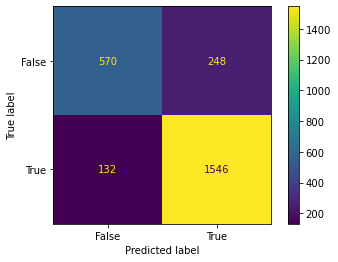

In [50]:
plot_confusion_matrix(cls,test_X,test_y)

Plot an ROC cure to show the classifier performance

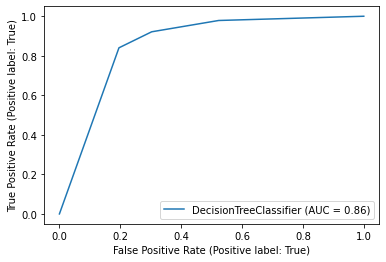

In [51]:
plot_roc_curve(cls,test_X,test_y)

Use the default view from SciKit Learn to plot the decision tree

[Text(279.0, 453.0, 'LogP <= 3.116\ngini = 0.44\nsamples = 7486\nvalue = [2451, 5035]'),
 Text(139.5, 271.8, 'LogP <= 2.559\ngini = 0.219\nsamples = 5282\nvalue = [662, 4620]'),
 Text(69.75, 90.59999999999997, 'gini = 0.161\nsamples = 4579\nvalue = [404, 4175]'),
 Text(209.25, 90.59999999999997, 'gini = 0.465\nsamples = 703\nvalue = [258, 445]'),
 Text(418.5, 271.8, 'LogP <= 4.03\ngini = 0.306\nsamples = 2204\nvalue = [1789, 415]'),
 Text(348.75, 90.59999999999997, 'gini = 0.451\nsamples = 851\nvalue = [559, 292]'),
 Text(488.25, 90.59999999999997, 'gini = 0.165\nsamples = 1353\nvalue = [1230, 123]')]

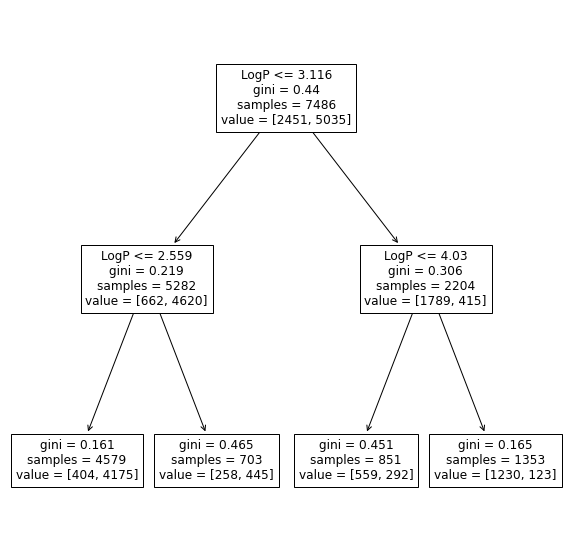

In [52]:
plt.rcParams["figure.figsize"] = (10,10)
plot_tree(cls,feature_names=desc_cols)

Use dtreeviz to plot the decision tree

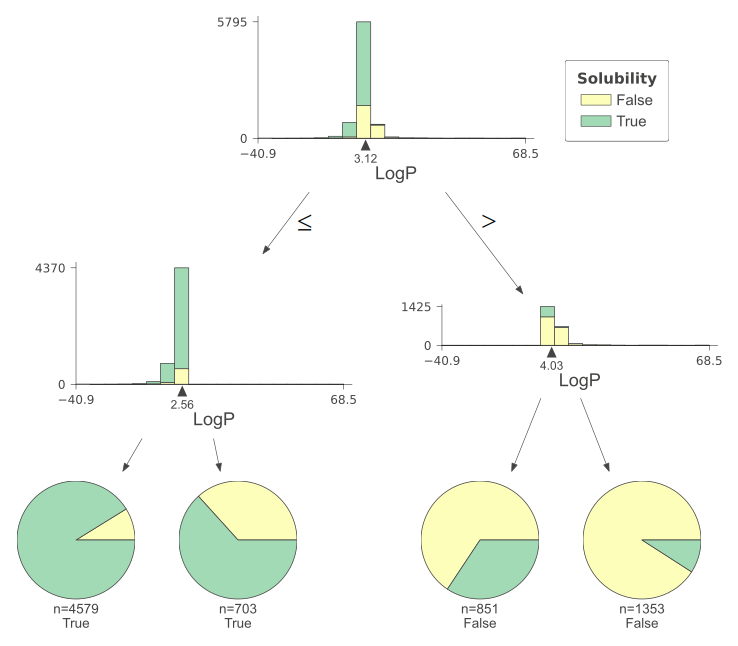

In [53]:
viz = dtreeviz(cls, train_X, train_y, feature_names = desc_cols, 
               target_name = "Solubility",class_names=["False","True"],scale=2)
viz

As a final check we're going to see if we can fit a model to incorrect data.  If we shuffle the y values, we shouldn't be able to get a good model. 

Shuffle the y-variable as a sanity check

In [55]:
sol_df['fake'] = sol_df.IsSol.sample(frac=1)

Split the dataframe into training a test sets. 

In [57]:
fake_train, fake_test = train_test_split(sol_df)

Split the training and test sets into X and y variables

In [58]:
fake_train_X = fake_train[desc_cols]
fake_train_y = fake_train.fake
fake_test_X = fake_test[desc_cols]
fake_test_y = fake_test.fake

Build a classifer

In [59]:
fake_cls = DecisionTreeClassifier(max_depth=2)
fake_cls.fit(fake_train_X,fake_train_y)

DecisionTreeClassifier(max_depth=2)

Generate the predictions

In [60]:
fake_pred = fake_cls.predict(fake_test_X)

Calculate the AUC score

In [61]:
roc_auc_score(fake_test_y,pred)

0.5083715484437508